STG OK
ODS OK
CONV OK
SYN OK
DICT OK
LINK_APP_REQUEST ERROR
DDS None
CALC None
MARTS None
PDN None
CALC_LINK_APP_PREAPP None
REPORTS None


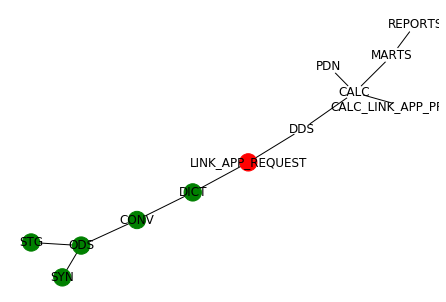

In [1]:
#1

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import cx_Oracle

ip = 'ORBITOP'
port = 1521
SID = 'XE'
dsn_tns = cx_Oracle.makedsn(ip, port, SID)

connection = cx_Oracle.connect('orbitiumnos', 'legomania97', dsn_tns)

query = """SELECT*
           FROM spaces_dependence
           """
df_ora = pd.read_sql(query, con=connection)

connection.close()

G = nx.from_pandas_edgelist(df_ora, 'FATHER', 'CHILD')

#2

connection = cx_Oracle.connect('orbitiumnos', 'legomania97', dsn_tns)

query = """SELECT*
           FROM reglament_status
           """
df_status = pd.read_sql(query, con=connection)

connection.close()

def get_status(node):
    return df_status[df_status['STAGE']==node]['STATUS'].values[0]

color_map = []

for node in G:
    if get_status(node) == 'OK':
        color_map.append('green')
    elif get_status(node) == 'ERROR':
        color_map.append('red')
    else:
        color_map.append('white')
    print(node, get_status(node))

# 3

nx.draw(G, node_color = color_map, with_labels=True)
plt.show()

In [42]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import cx_Oracle

In [43]:
ip = 'ORBITOP'
port = 1521
SID = 'XE'
dsn_tns = cx_Oracle.makedsn(ip, port, SID)

connection = cx_Oracle.connect('orbitiumnos', 'legomania97', dsn_tns)

query = """SELECT *
           FROM log_dependence
           """
df_ora = pd.read_sql(query, con=connection)

connection.close()

G = nx.from_pandas_edgelist(df_ora, 'OBJ_DEP', 'OBJ')

In [50]:
import random


def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 

    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))
    print('Root: ', root)

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [51]:
for node in G.nodes():
    print(node)

ODS.RTD_PRODUCT
DDS.APPLICATION
ODS.RTD_APPLICATION
ODS.SBL_ST_OPTY
DDS.CALC_LINK_APP_REQUEST
DDS.SCORING
MARTS.DM_APPLICATION_DATA


Root:  DDS.SCORING
Pos:  {'DDS.SCORING': (0.5, 0), 'DDS.APPLICATION': (0.5, -0.2), 'ODS.RTD_PRODUCT': (0.1, -0.4), 'ODS.RTD_APPLICATION': (0.30000000000000004, -0.4), 'ODS.SBL_ST_OPTY': (0.5, -0.4), 'DDS.CALC_LINK_APP_REQUEST': (0.7, -0.4), 'MARTS.DM_APPLICATION_DATA': (0.8999999999999999, -0.4)}


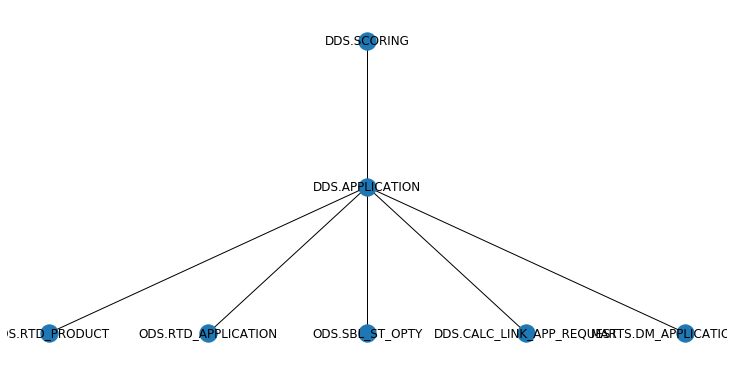

In [55]:
#r = []

pos = hierarchy_pos(G)
print ('Pos: ',pos)
plt.figure(figsize=(10,5))
nx.draw(G, pos=pos, with_labels=True)
plt.show()